# DATA ANALYSIS OF KAGGLE SURVEY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
survey_data = pd.read_csv('C:/Users/Acer/Desktop/kaggle/set/kagglesurvey.csv')

In [3]:
survey_data.head(20)

,Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect
0,1,"Amazon Web services,Oracle Data Mining/ Oracle...",F#,Internet-based,"Neural Networks,Random Forests,RNNs"
1,2,"Amazon Machine Learning,Amazon Web services,Cl...",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Fore..."
2,3,"C/C++,Jupyter notebooks,MATLAB/Octave,Python,R...",Python,Technology,"Bayesian Techniques,CNNs,Ensemble Methods,Neur..."
3,4,"Jupyter notebooks,Python,SQL,TensorFlow",Python,Academic,"Bayesian Techniques,CNNs,Decision Trees,Gradie..."
4,5,"C/C++,Cloudera,Hadoop/Hive/Pig,Java,NoSQL,R,Un...",R,Government,NaN
5,6,SQL,Python,Non-profit,NaN
6,7,"Jupyter notebooks,NoSQL,Python,R,SQL,Unix shel...",Python,Internet-based,"CNNs,Decision Trees,Gradient Boosted Machines,..."
7,8,"Python,Spark / MLlib,Tableau,TensorFlow,Other",Python,Mix of fields,"Bayesian Techniques,CNNs,HMMs,Neural Networks,..."
8,9,"Jupyter notebooks,MATLAB/Octave,Python,SAS Bas...",Python,Financial,"Ensemble Methods,Gradient Boosted Machines"
9,10,"C/C++,IBM Cognos,MATLAB/Octave,Microsoft Excel...",R,Technology,"Bayesian Techniques,Regression/Logistic Regres..."


In [4]:
survey_data.shape

(10153, 5)

In [6]:
type(survey_data)

pandas.core.frame.DataFrame

In [7]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10153 entries, 0 to 10152
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Respondent                    10153 non-null  int64 
 1   WorkToolsSelect               7955 non-null   object
 2   LanguageRecommendationSelect  6534 non-null   object
 3   EmployerIndustry              8998 non-null   object
 4   WorkAlgorithmsSelect          7301 non-null   object
dtypes: int64(1), object(4)
memory usage: 396.7+ KB


#### Data Cleaning

In [8]:
survey_data.isnull()

,Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True
...,...,...,...,...,...
10148,False,True,True,False,True
10149,False,False,True,False,True
10150,False,True,True,True,True
10151,False,True,True,False,True


In [9]:
survey_data.isnull().sum()

Respondent                         0
WorkToolsSelect                 2198
LanguageRecommendationSelect    3619
EmployerIndustry                1155
WorkAlgorithmsSelect            2852
dtype: int64

#### Check data with 90% empty column

In [10]:
threshold = len(survey_data)*0.1
threshold

1015.3000000000001

In [11]:
survey_data.dropna(thresh=threshold, axis=1, inplace=True)

In [12]:
print(survey_data.isnull().sum())

Respondent                         0
WorkToolsSelect                 2198
LanguageRecommendationSelect    3619
EmployerIndustry                1155
WorkAlgorithmsSelect            2852
dtype: int64


#### Fill null with mode (categorical)

In [13]:
print(survey_data['WorkToolsSelect'].mode())
print(survey_data['LanguageRecommendationSelect'].mode())
print(survey_data['EmployerIndustry'].mode())
print(survey_data['WorkAlgorithmsSelect'].mode())

0    Python,R
dtype: object
0    Python
dtype: object
0    Technology
dtype: object
0    Regression/Logistic Regression
dtype: object


In [14]:
survey_data['WorkToolsSelect'].fillna(str(survey_data['WorkToolsSelect'].mode().values[0]), inplace=True)
survey_data['LanguageRecommendationSelect'].fillna(str(survey_data['LanguageRecommendationSelect'].mode().values[0]), inplace=True)
survey_data['EmployerIndustry'].fillna(str(survey_data['EmployerIndustry'].mode().values[0]), inplace=True)
survey_data['WorkAlgorithmsSelect'].fillna(str(survey_data['WorkAlgorithmsSelect'].mode().values[0]), inplace=True)

In [15]:
survey_data.isnull().sum()

Respondent                      0
WorkToolsSelect                 0
LanguageRecommendationSelect    0
EmployerIndustry                0
WorkAlgorithmsSelect            0
dtype: int64

In [16]:
survey_data.head()

,Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect
0,1,"Amazon Web services,Oracle Data Mining/ Oracle...",F#,Internet-based,"Neural Networks,Random Forests,RNNs"
1,2,"Amazon Machine Learning,Amazon Web services,Cl...",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Fore..."
2,3,"C/C++,Jupyter notebooks,MATLAB/Octave,Python,R...",Python,Technology,"Bayesian Techniques,CNNs,Ensemble Methods,Neur..."
3,4,"Jupyter notebooks,Python,SQL,TensorFlow",Python,Academic,"Bayesian Techniques,CNNs,Decision Trees,Gradie..."
4,5,"C/C++,Cloudera,Hadoop/Hive/Pig,Java,NoSQL,R,Un...",R,Government,Regression/Logistic Regression


#### Most language used by respondent

In [26]:
survey_language = pd.DataFrame(survey_data.groupby('LanguageRecommendationSelect').count())
survey_language.head()

,Respondent,WorkToolsSelect,EmployerIndustry,WorkAlgorithmsSelect
LanguageRecommendationSelect,,,,
C/C++/C#,142,142,142,142
F#,2,2,2,2
Haskell,12,12,12,12
Java,58,58,58,58
Julia,21,21,21,21


In [27]:
survey_language.sort_values('Respondent', ascending=False)

,Respondent,WorkToolsSelect,EmployerIndustry,WorkAlgorithmsSelect
LanguageRecommendationSelect,,,,
Python,7668,7668,7668,7668
R,1670,1670,1670,1670
SQL,272,272,272,272
C/C++/C#,142,142,142,142
Matlab,122,122,122,122
Scala,70,70,70,70
Java,58,58,58,58
SAS,50,50,50,50
Other,48,48,48,48


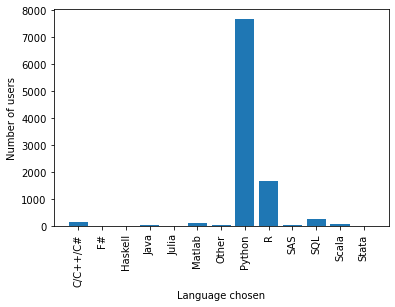

In [28]:
languages = [i for i, df in survey_data.groupby('LanguageRecommendationSelect')]

plt.bar(languages, survey_language['Respondent'])
plt.xticks(languages, rotation=90)
plt.xlabel('Language chosen')
plt.ylabel('Number of users')
plt.show()

In [48]:
survey_industries = pd.DataFrame(survey_data.groupby('LanguageRecommendationSelect').count())
survey_industries.head()

,Respondent,WorkToolsSelect,EmployerIndustry,WorkAlgorithmsSelect
LanguageRecommendationSelect,,,,
C/C++/C#,142,142,142,142
F#,2,2,2,2
Haskell,12,12,12,12
Java,58,58,58,58
Julia,21,21,21,21


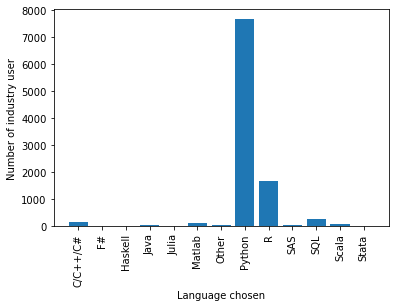

In [49]:
industries = [i for i, df in survey_data.groupby('EmployerIndustry')]

plt.bar(languages, survey_industries['EmployerIndustry'])
plt.xticks(languages, rotation=90)
plt.xlabel('Language chosen')
plt.ylabel('Number of industry user')
plt.show()